In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

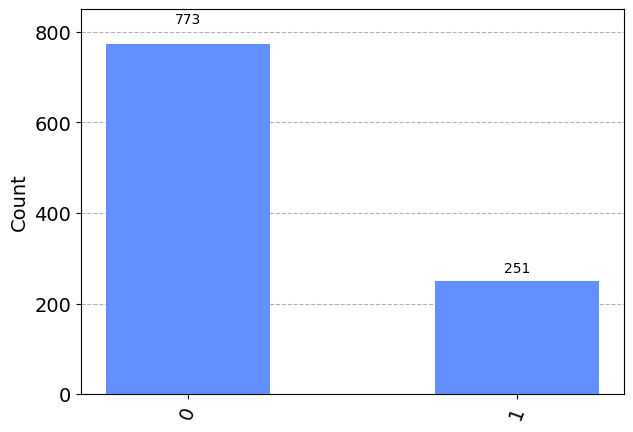

In [11]:
from qiskit import *
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, execute, Aer
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city, plot_state_qsphere


# Initialization
q = QuantumRegister(9, 'q')
r = ClassicalRegister(1)
c = QuantumCircuit(q,r)

# Encoding
c.cx(q[0], q[3])
c.cx(q[0], q[6])

c.h(q[0])
c.h(q[3])
c.h(q[6])

c.cx(q[0], q[1])
c.cx(q[0], q[2])
c.cx(q[3], q[4])
c.cx(q[3], q[5])
c.cx(q[6], q[7])
c.cx(q[6], q[8])

# Error Correction
c.cx(q[0], q[1])
c.cx(q[0], q[2])
c.ccx(q[2], q[1], q[0])

c.cx(q[3], q[4])
c.cx(q[3], q[5])
c.ccx(q[5], q[4], q[3])

c.cx(q[6], q[7])
c.cx(q[6], q[8])
c.ccx(q[8], q[7], q[6])

c.h(q[0])
c.h(q[3])
c.h(q[6])

c.cx(q[0], q[3])
c.cx(q[0], q[6])
c.ccx(q[6], q[3], q[0])

c.measure(0, r)
# Define the noise model
noise_model = NoiseModel()
depolarizing_error_rate = 0.1

# Define depolarizing errors for single and two-qubit gates
single_qubit_depolarizing_error = depolarizing_error(depolarizing_error_rate, 1)
two_qubit_depolarizing_error = depolarizing_error(depolarizing_error_rate, 2)
three_qubit_depolarizing_error = depolarizing_error(depolarizing_error_rate, 3)

# Add errors to the noise model
noise_model.add_all_qubit_quantum_error(single_qubit_depolarizing_error, ['x'])
noise_model.add_all_qubit_quantum_error(two_qubit_depolarizing_error, ['cx'])
noise_model.add_all_qubit_quantum_error(three_qubit_depolarizing_error, ['ccx'])

backend = Aer.get_backend('qasm_simulator') ##'statevector_simulator' 'qasm_simulator'
result = execute(c, backend, shots=1024, noise_model=noise_model).result() 
#psi  = result.get_statevector(c)
counts = result.get_counts(c)

# Visualizing the circuit
#c.draw(output='mpl')
#Output
plot_histogram(counts)
#plot_state_qsphere(psi)